Matteo Picciolini

# Esercitazione 11 - Esercizio 11.2

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

#center graphs
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

2023-06-26 14:18:23.368911: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 14:18:23.797714: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-26 14:18:23.800322: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-26 14:18:25.858579: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

### Soluzione
Per risolvere questo esercizio estendo il codice che  ho già scritto per l'esercizio precedente. Come prima, imposto i valori delle variabili necessarie per le varie fasi di costruzione del modello. Mostro poi un grafico con la funzione di *target* e i dati della fase di *test*.

In [2]:
N_epochs = 30
N_train = 1000 # <<< train
N_valid = 50 # <<< test
sigma = 0.2

# f(x) = a*x^3 + b*x^2 + c*x + d
def f(x, a = 3, b = -2, c = -3, d = 4):
    return a*x**3 + b*x**2 + c*x + d

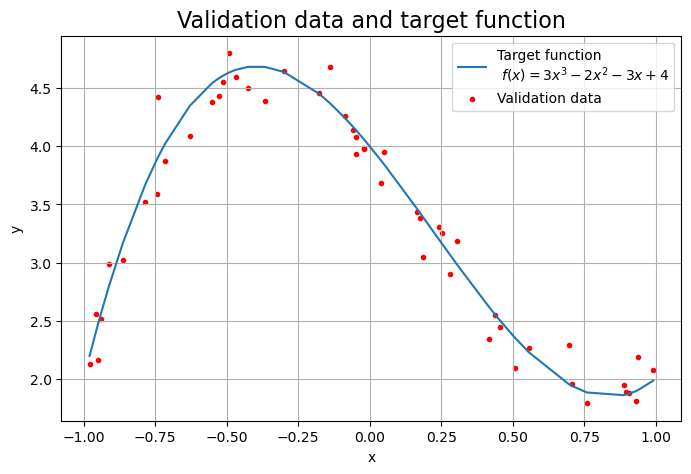

In [3]:
# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================
np.random.seed(0)
x_train = np.random.uniform(-1, 1, N_train)
x_valid = np.random.uniform(-1, 1, N_valid)
x_valid.sort()

y_target = f(x = x_valid)

y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

plt.figure(figsize = (8,5))
plt.plot(x_valid, y_target, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.scatter(x_valid, y_valid, marker = ".", color='r', label='Validation data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Validation data and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

Costruisco ora la rete neurale e procedo con l'allenamento della rete. Procedo poi con il *tuning* dei parametri.

In [4]:
model = tf.keras.Sequential()
# activation: relu-si, elu-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no, exponential-no
act = 'relu'
model.add(Dense(40, input_shape = (1,), activation = act))
model.add(Dense(20, activation = act))
model.add(Dense(1, activation = act))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = N_epochs, shuffle = True,
                    validation_data = (x_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                80        
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


2023-06-26 14:18:29.782957: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/30
32/32 [==============================] - 1s 7ms/step - loss: 11.2458 - mse: 11.2458 - val_loss: 9.5242 - val_mse: 9.5242
Epoch 2/30
32/32 [==============================] - 0s 3ms/step - loss: 8.8554 - mse: 8.8554 - val_loss: 6.3512 - val_mse: 6.3512
Epoch 3/30
32/32 [==============================] - 0s 3ms/step - loss: 4.9559 - mse: 4.9559 - val_loss: 2.6368 - val_mse: 2.6368
Epoch 4/30
32/32 [==============================] - 0s 5ms/step - loss: 1.9121 - mse: 1.9121 - val_loss: 1.3086 - val_mse: 1.3086
Epoch 5/30
32/32 [==============================] - 0s 5ms/step - loss: 1.0322 - mse: 1.0322 - val_loss: 1.0644 - val_mse: 1.0644
Epoch 6/30
32/32 [==============================] - 0s 4ms/step - loss: 0.7727 - mse: 0.7727 - val_loss: 0.8499 - val_mse: 0.8499
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.6134 - mse: 0.6134 - val_loss: 0.6777 - val_mse: 0.6777
Epoch 8/30
32/32 [==============================] - 0s 4ms/step - loss: 0.4877 - mse: 0.

Mostro ora i risultati ottenuti in fase di test.

In [5]:
print("Results")
w = model.get_weights()

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(x_valid, y_valid, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(x_valid, y_target, batch_size = 32, verbose = 0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

Results
TEST DATA evaluation
Test loss:      0.0695779100060463
Test accuracy:  0.0695779100060463

EXACT CURVE evaluation
Test loss:      0.02975771576166153
Test accuracy:  0.02975771576166153


4/4 [==============================] - 0s 2ms/step


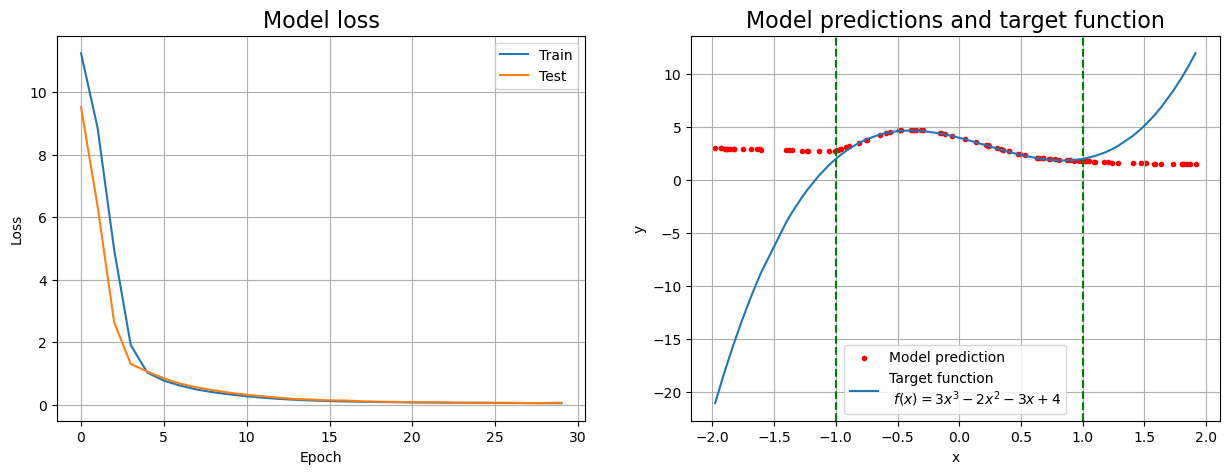

In [6]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 16)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'best')
plt.grid()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-2, 2, 100) 
y_predicted = model.predict(x_predicted)

plt.subplot(1,2,2)
plt.scatter(x_predicted, y_predicted, marker = ".", color='r', label = "Model prediction")
x_predicted.sort()
y_target_ext = f(x_predicted)
plt.axvline(1., color = 'g', linestyle = '--')
plt.axvline(-1., color = 'g', linestyle = '--')
plt.plot(x_predicted, y_target_ext, label = "Target function\n $f(x) = 3x^3 - 2x^2 - 3x + 4$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model predictions and target function", fontsize = 16)
plt.grid()
plt.legend()
plt.show()

Nell'ultimo specchietto rappresento a sinistra l'andamento della *loss* per i dati di *trainig* e per i dati di *test*. Si può notare che, come nell'esercizio precendete, superate le 15 epoche il valore della *loss* è circa costante. Non è, quindi, necessario raggiungere le 30 epoche per ottenere dei risultati soddisfacenti. 

A destra si mostrano, invece, le predizioni del modello di nuovi punti nell'intervallo $\left[-2, \, 2 \right]$. Si può notarare come i valori appartenenti all'intervallo di *training* ($\left[-1, \, 1 \right]$) riproducano con precisione accettabile i valori che assume la funzione $f$. Al di fuori di questo intervallo, invece, il modello, non avendo punti su cui effettuare il training, non riesce a riprodurre l'andamento della funzione.

#### Osservazioni

Dopo aver confrontato diverse funzioni di attivazione, ho riscontrato che la `ReLU` ha prodotto i risultati migliori, seguita dalla `ELU`. Per quanto riguarda gli ottimizzatori, non ho notato differenze significative tra le varie opzioni testate. Durante tutte le fasi di calibrazione, la `mse` è stata la loss function che ha fornito i risultati migliori.

Inoltre, il modello risponde bene alla modifica del valore di $\sigma$, entro il range di $\sigma \in \left[0, 1\right]$.